# Lab Course Machine Learning
## Exercise Sheet 6
### Prof. Dr. Dr. Lars Schmidt-Thieme, Hadi Samer Jomaa.
### Information Systems and Machine Learning Lab.
#### University of Hildesheim.

#### Datasets

1. Regression Datasets

(a) Generate a Sample dataset called D1 :

    i. Initialize matrix x ∈ R100×1 using Uniform distribution with μ =1 and σ = 0.05
    ii. Generate target y ∈ R100×1 using → y = 1.3x² + 4.8x + 8 + ξ, where ξ ∈ R100×1 randomly initialized.
    
(b) Wine Quality called D2: (use winequality-red.csv)http://archive.ics.uci.edu/ml/datasets/Wine+Quality



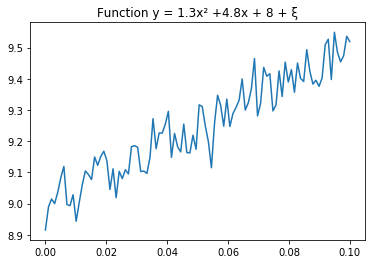

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Regression Data Sets

#Generating sample data set
ξ = np.random.normal(1,0.05,(100,1))
D1x =  np.array([np.linspace(0,1e-1,100)]).T 
D1y = 1.3*D1x**2 +4.8*D1x+8 + ξ
plt.title("Function y = 1.3x² +4.8x + 8 + ξ")
plt.plot(D1x,D1y)
plt.show()

#Import Data Set from web
D2 = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")
D2.head()

### Exercise 1: Generalized Linear Models with Scikit Learn (12 Points)
In previous labs you have implemented various optimization algorithms to solve linear or logistic regression
problem. In this task you are required to use Scikit Learn to experiment with following linear models and
Stochastic Gradient Descent (SGD) [Hint: use SGDRegressor].
    
    1. Ordinary Least Squares
    2. Ridge Regression
    3. LASSO

#### Following are required in this task
1. Split your data into Train and Test Splits. Use dataset D2

2. For each model, pick three sets of hyperparameters and learn each model (without cross validation).Measure Train and Test RMSE and plot it on one plot. Explain the plots and relate it to the theory studied in lectures i.e. influence of regularized vs non-regularized models. You have to compare the following models and argument should explain underfitting and overfitting.
    
3. Now tune the hyperparameters using scikit learn GridSearchCV and plot the results of cross validation for each model. [Hint: use cv_results_ to see different options]

4. Using the optimal hyperparameter you have to evaluate each model using cross_val_score. Plot each model using boxplot and explain how significant are your results.


In [980]:
def Normalize(Matrix): #For normalize an array of data
    Matrix = (Matrix - np.average(Matrix,axis=0))/np.std(Matrix,axis=0)
    return Matrix


#For splitting DataFrames
def splitDf(Dataframe): #Assume that the last column always will contain the "Y values and that values in "Y" are NOT strings
    Y = np.array([Dataframe.iloc[:,-1]]).T                        #Converting the Y column into array
    Dataframe = Dataframe.drop(Dataframe.columns[[-1,]], axis=1)  #Getting dummies and converting X into array
    X = Normalize(np.array(pd.get_dummies(Dataframe)))            #Normalizing data  
    Matrix = np.concatenate((X,Y),axis =1)                        #We get X and Y together again to do the split
    msk = np.random.rand(len(Matrix)) < 0.8                       #Random assign
    tr = Matrix[msk]
    tst = Matrix[~msk]    
    Ytr = np.array([tr[:,-1]]).T
    Xtr= tr[:,0:-1]
    Ytst = np.array([tst[:,-1]]).T
    Xtst= tst[:,0:-1]
    return Xtr, Ytr, Xtst, Ytst                                   #Tr is for training, Tst is for testing

def Plot_this(Data,Labels,C):
    labels = Labels
    xs = np.arange(len(labels)) 
    n_groups = len(labels)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.65
    opacity = 0.6
    rects1 = plt.bar(index, Data, bar_width,
                 alpha=opacity,
                 color=C,
                 label='Score Value')
    plt.xlabel('α (StepLengt))')
    plt.ylabel('Score')
    plt.title('SGD Ols Lin Reg - Grid Search')
    plt.xticks(xs, labels) 
    plt.legend()
    plt.tight_layout()
    plt.show()
    
def Aplot_this2(Data1, Data2,c1,c2,Labels,t,xl):
    labels = Labels
    xs = np.arange(len(labels)) 
    n_groups = len(labels)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.45
    opacity = 0.8
    rects1 = plt.bar(index, Data1, bar_width,
                 alpha=opacity,
                 color=c1,
                 label='MSE Train')
 
    rects2 = plt.bar(index + bar_width, Data2, bar_width,
                 alpha=opacity,
                 color=c2,
                 label='MSE Test')
    plt.xlabel(xl)
    plt.ylabel('MSE')
    plt.title("MSE SGD Linear Regression"+ t)
    plt.xticks(xs, labels) 
    #plt.axis([-0.5,3,0.38,0.46])
    plt.legend()
    plt.tight_layout()
    plt.show()


In [3]:
D2xtr, D2ytr, D2xtst, D2ytst = splitDf(D2)  #Data already normalized!!!

### Ordinary Least Squares (OLS)

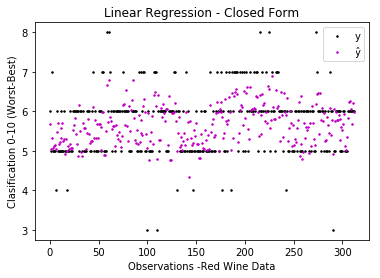

Mean squared error: 0.4058


In [864]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as sklm

#Normal Linear Regression
regr = sklm.LinearRegression()
regr.fit(D2xtr,D2ytr)
D2predLR = regr.predict(D2xtst)
plt.plot(D2ytst,'ko',markersize=1.5)
plt.plot(D2predLR,'mo',markersize=1.5)
plt.xlabel("Observations -Red Wine Data")
plt.ylabel("Clasification 0-10 (Worst-Best)")
plt.legend(["y","ŷ"])
plt.title("Linear Regression - Closed Form")
plt.show()
print("Mean squared error: %.4f" %mean_squared_error(D2ytst,D2predLR))

#SGD Linear Regression, no penalties
LRstep = [0.01,0.001,0.0001]

def OlSearch(ParamList):
    yLMSE = []
    ŷLMSE = []
    for i in ParamList:
        SGDOls = sklm.SGDRegressor(loss= 'squared_loss', penalty='None',fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True, learning_rate='constant',eta0=i)
        SGDOls.fit(D2xtr,D2ytr.ravel())
        D2yLR = SGDOls.predict(D2xtr)
        D2ŷLR = SGDOls.predict(D2xtst)
        yMSError = mean_squared_error(D2ytr,D2yLR)
        ŷMSError = mean_squared_error(D2ytst,D2ŷLR)
        yLMSE.append(yMSError)
        ŷLMSE.append(ŷMSError)
    return yLMSE, ŷLMSE

Olsy,Olsŷ = OlSearch(LRstep)

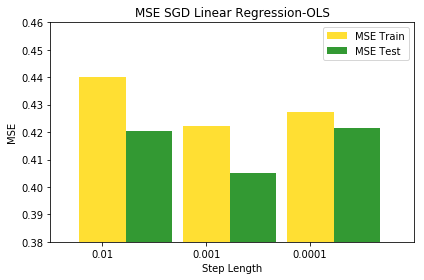

In [886]:
Aplot_this2(Olsy,Olsŷ,"gold","g",LRstep,"-OLS","Step Length")

### Ridge Regression

In [533]:
import itertools as it

#SGD Linear Regression, Ridge 
Step = [1e-3,1e-1]                                #List of values of stepsize
Ridge = [1e-3,1]                                 #List of values of Ridge regularization
Rdgcomb = np.array(list(it.product(Step,Ridge))) #Posible combiations on Step Size-Ridge Regularization

def RdgSearch(ParamList):
    yLMSE = []
    ŷLMSE = []
    for i in np.arange(len(ParamList)):
        α, λ = ParamList[i]
        SGDRdg = sklm.SGDRegressor(loss= 'squared_loss', penalty='l2',alpha=λ,fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True, learning_rate='optimal',eta0=α)
        SGDRdg.fit(D2xtr,D2ytr.ravel())
        D2yLR = SGDRdg.predict(D2xtr)
        D2ŷLR = SGDRdg.predict(D2xtst)
        yMSError = mean_squared_error(D2ytr,D2yLR)
        ŷMSError = mean_squared_error(D2ytst,D2ŷLR)
        yLMSE.append(yMSError)
        ŷLMSE.append(ŷMSError)
    return yLMSE, ŷLMSE

Rdgy,Rdgŷ = RdgSearch(Rdgcomb)


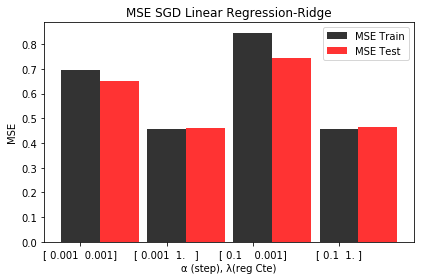

In [890]:
Aplot_this2(Rdgy,Rdgŷ,"k","r",Rdgcomb,"-Ridge", "α (step), λ(reg Cte)")

### LASSO

In [553]:
#SGD Linear Regression, Lasso
Step = [1e-3,1e-2]                                 #List of values of stepsize
λ = [1e-2,1]                                       #List of values of Ridge regularization
Lassocomb = np.array(list(it.product(Step,λ)))     #Posible combiations on Step Size-Ridge Regularization

def LassoSearch(ParamList):
    yLMSE = []
    ŷLMSE = []
    for i in np.arange(len(ParamList)):
        α, λ = ParamList[i]
        SGDLasso = sklm.SGDRegressor(loss= 'squared_loss', penalty='l1',alpha=λ,fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True, learning_rate='constant',eta0=α)
        SGDLasso.fit(D2xtr,D2ytr.ravel())
        D2yLR = SGDLasso.predict(D2xtr)
        D2ŷLR = SGDLasso.predict(D2xtst)
        yMSError = mean_squared_error(D2ytr,D2yLR)
        ŷMSError = mean_squared_error(D2ytst,D2ŷLR)
        yLMSE.append(yMSError)
        ŷLMSE.append(ŷMSError)
    return yLMSE, ŷLMSE

Lassoy,Lassoŷ = LassoSearch(Lassocomb)

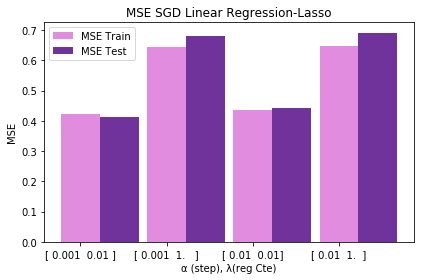

In [891]:
Aplot_this2(Lassoy,Lassoŷ,"orchid","indigo",Lassocomb,"-Lasso", "α (step), λ(reg Cte)")

## Grid Search

## OLS


In [677]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

Step = [1e-2,5e-3,1e-3,5e-4,1e-4]
parameters =  {"eta0":Step}
SGDOls = sklm.SGDRegressor(loss= 'squared_loss', penalty='None',fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True, learning_rate='constant',eta0=1)

grid = GridSearchCV(SGDOls, parameters)
grid.fit(D2xtr,D2ytr.ravel())
results = pd.DataFrame(grid.cv_results_)
print("Best value: ",grid.best_estimator_.eta0)
print("Score: ",grid.best_score_)
results.iloc[:,2:7]


Best value:  0.005
Score:  0.316828696097


,mean_test_score,mean_train_score,param_eta0,params,rank_test_score
0,0.304415,0.321058,0.01,{'eta0': 0.01},2
1,0.316829,0.338829,0.005,{'eta0': 0.005},1
2,0.297720,0.353966,0.001,{'eta0': 0.001},4
3,0.298609,0.350447,0.0005,{'eta0': 0.0005},3
4,0.259928,0.327755,0.0001,{'eta0': 0.0001},5


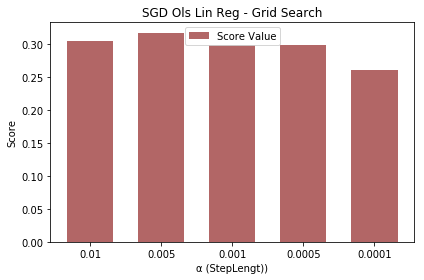

In [854]:
#Scores Bar Plot
Plot_this(results.iloc[:,2], Step, "maroon")

## Grid Search

## Ridge

In [655]:
Step = [1e-4,1e-3,1e-2]
Ridge = [1e-5,1e-3,1e-2]
Rdgparameters =  {"eta0":Step,"alpha":Ridge }
SGDRdg = sklm.SGDRegressor(loss= 'squared_loss', penalty='l2',fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True, learning_rate='optimal')
        
Rdgrid = GridSearchCV(SGDRdg, Rdgparameters)
Rdgrid.fit(D2xtr,D2ytr.ravel())
Rdgresults = pd.DataFrame(Rdgrid.cv_results_)
print("Best Parameters α: ",Rdgrid.best_estimator_.eta0," λ: ",Rdgrid.best_estimator_.alpha)
print("Score: ",Rdgrid.best_score_)
Rdgresults.iloc[:,2:8]

Best Parameters α:  0.01  λ:  0.01
Score:  0.287856676004


,mean_test_score,mean_train_score,param_alpha,param_eta0,params,rank_test_score
0,-1.613589e+27,-2.099032e+27,1e-05,0.0001,"{'alpha': 1e-05, 'eta0': 0.0001}",7
1,-2.399666e+27,-2.354561e+27,1e-05,0.001,"{'alpha': 1e-05, 'eta0': 0.001}",8
2,-3.857330e+27,-4.450965e+27,1e-05,0.01,"{'alpha': 1e-05, 'eta0': 0.01}",9
3,-2.799469e+21,-3.647386e+21,0.001,0.0001,"{'alpha': 0.001, 'eta0': 0.0001}",4
4,-4.234991e+23,-5.829145e+23,0.001,0.001,"{'alpha': 0.001, 'eta0': 0.001}",6
5,-2.185390e+23,-2.880109e+23,0.001,0.01,"{'alpha': 0.001, 'eta0': 0.01}",5
6,2.773209e-01,3.421261e-01,0.01,0.0001,"{'alpha': 0.01, 'eta0': 0.0001}",2
7,2.731613e-01,3.378192e-01,0.01,0.001,"{'alpha': 0.01, 'eta0': 0.001}",3
8,2.878567e-01,3.430555e-01,0.01,0.01,"{'alpha': 0.01, 'eta0': 0.01}",1


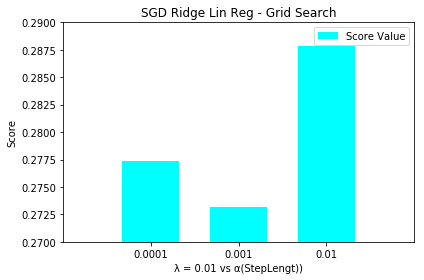

In [859]:
#Scores Bar Plot for Ridge - NOTE: ONLY THE LAST 3 VALUES OF THE RESULTS-FRAME WERE PLOTTED
Plot_this(Rdgresults.iloc[6:9:,2],Rdgresults.iloc[6:9:,5],"cyan")

## Grid Search

## Lasso

In [651]:
Step = [1e-5,1e-3,1e-1]
λ = [1e-2,1e-3,1e-5] 
Lassoparameters =  {"eta0":Step,"alpha":λ }
SGDLasso = sklm.SGDRegressor(loss= 'squared_loss', penalty='l1',fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True, learning_rate='optimal')
        
Lassogrid = GridSearchCV(SGDLasso, Lassoparameters)
Lassogrid.fit(D2xtr,D2ytr.ravel())
Lassoresults = pd.DataFrame(Lassogrid.cv_results_)
print("Best Parameters α: ",Lassogrid.best_estimator_.eta0," λ: ",Lassogrid.best_estimator_.alpha)
print("Score: ",Lassogrid.best_score_)
Lassoresults.iloc[:,2:8]

Best Parameters α:  0.001  λ:  0.01
Score:  0.220375468249


,mean_test_score,mean_train_score,param_alpha,param_eta0,params,rank_test_score
0,1.834428e-01,2.708989e-01,0.01,1e-05,"{'alpha': 0.01, 'eta0': 1e-05}",3
1,2.203755e-01,2.891871e-01,0.01,0.001,"{'alpha': 0.01, 'eta0': 0.001}",1
2,2.198417e-01,2.935597e-01,0.01,0.1,"{'alpha': 0.01, 'eta0': 0.1}",2
3,-3.650153e+22,-5.112506e+22,0.001,1e-05,"{'alpha': 0.001, 'eta0': 1e-05}",6
4,-8.221352e+21,-6.842579e+21,0.001,0.001,"{'alpha': 0.001, 'eta0': 0.001}",5
5,-1.013171e+21,-1.792639e+21,0.001,0.1,"{'alpha': 0.001, 'eta0': 0.1}",4
6,-3.572129e+27,-2.633021e+27,1e-05,1e-05,"{'alpha': 1e-05, 'eta0': 1e-05}",8
7,-5.049968e+27,-5.493862e+27,1e-05,0.001,"{'alpha': 1e-05, 'eta0': 0.001}",9
8,-1.869952e+27,-1.937118e+27,1e-05,0.1,"{'alpha': 1e-05, 'eta0': 0.1}",7


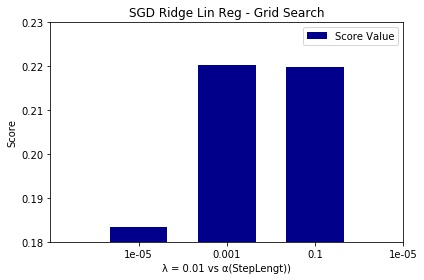

In [860]:
#Scores Bar Plot for Ridge - NOTE: ONLY THE FIRST 3 VALUES OF THE RESULTS FRAME WERE PLOTTED
Plot_this(Lassoresults.iloc[0:4:,2],Lassoresults.iloc[0:4:,5],"darkblue")

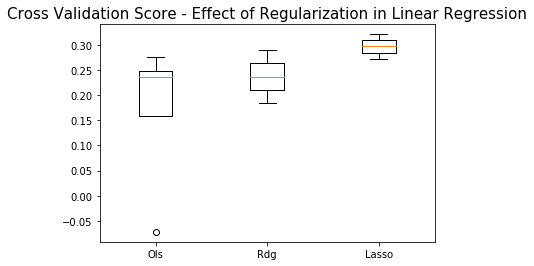

In [829]:
#Cross Validation - Fold n=5 , values stored to be usedo on final Boxplot
SGDOls = sklm.SGDRegressor(loss= 'squared_loss', penalty='None',fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True, learning_rate='constant',eta0=0.0001)
CVOls =cross_val_score(SGDOls,D2xtst,D2ytst.ravel(),cv=5)

#Cross Validation - Fold n=5 , values stored to be usedo on final Boxplot
SGDRdg = sklm.SGDRegressor(loss= 'squared_loss',alpha=0.01, penalty='l2',fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True, learning_rate='optimal', eta0=0.001)
CVRdg =cross_val_score(SGDRdg,D2xtst,D2ytst.ravel(),cv=5,)

#Cross Validation - Fold n=5 , values stored to be usedo on final Boxplot
SGDLasso = sklm.SGDRegressor(loss= 'squared_loss',alpha=0.01, penalty='l1',fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True, learning_rate='optimal', eta0=0.1)
CVLasso =cross_val_score(SGDRdg,D2xtst,D2ytst.ravel(),cv=5,)

labels = ["Ols","Rdg","Lasso"]
fs = 15
RMSE = [CVOls,CVRdg,CVLasso]
plt.figure()
plt.boxplot(RMSE, labels = labels)
plt.title("Cross Validation Score - Effect of Regularization in Linear Regression", fontsize=fs)
plt.show()

#### The best scored method was the Lasso. Ols and Ridge performed similar

### Exercise 2: Polynomial Regression (8 Points)
In this task you are required to use dataset D1 . So far we have only looked at 1st degree polynomial, i.e. linear polynomial and your D1 is also generated using linear polynomial. In this task you have to use more degrees of polynomial feature for your data i.e. degrees 1, 2, 7, 10, 16 and 100. [Hint: use sklearn.preprocessing to generate polynomial features].
Your tasks are:
#### 1. Task A: Prediction with high degree of polynomials
    (a) For each newly created dataset learn LinearRegression.
    (b) Plot prediction curves for each reprocessed data and (y vs x). 
    Which phenomena you observed for different prediction curves.?

#### R: A higher degrees, the model is trying to also fit the noise of the data result

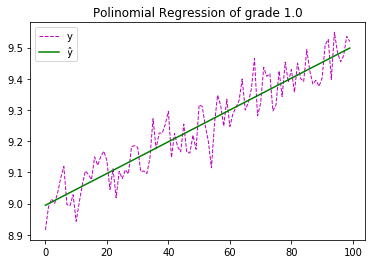

Mean squared error: 0.0029


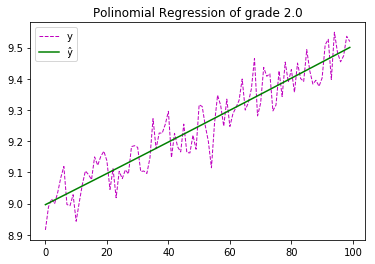

Mean squared error: 0.0029


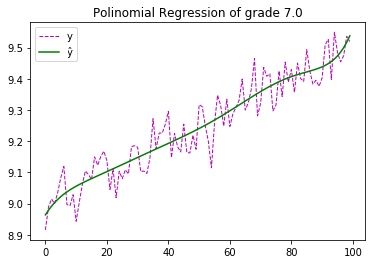

Mean squared error: 0.0028


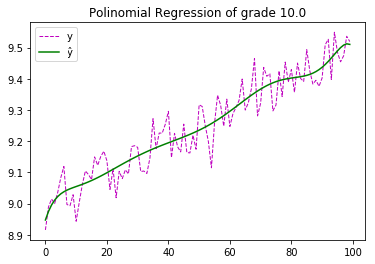

Mean squared error: 0.0027


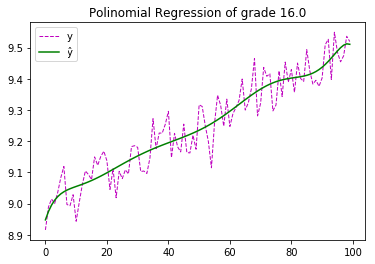

Mean squared error: 0.0027


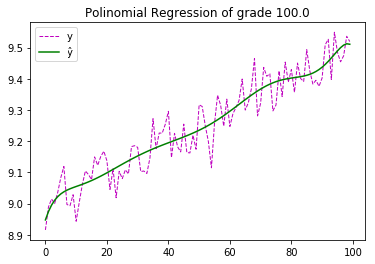

Mean squared error: 0.0027


In [892]:
from sklearn.preprocessing import PolynomialFeatures

Polylist = np.array([1,2,7,10,16,100])   #List of the polinomials grade to be tested

def TaskA(Polylist):
    LMSE = []
    for i in Polylist:
        poly   = PolynomialFeatures(i)
        Xtrans = poly.fit_transform(D1x)
        #Normal Linear Regression
        Linreg = sklm.LinearRegression()
        Linreg.fit(Xtrans,D1y)
        #print('Coefficients: \n', regr.coef_)
        D1ŷ = Linreg.predict(Xtrans)
        plt.plot(D1y,'--m',linewidth=1)
        plt.plot(D1ŷ,'-g')
        plt.title("Polinomial Regression of grade %.1f"%i)
        plt.legend(["y", "ŷ"])
        plt.show()
        MSE = mean_squared_error(D1y,D1ŷ)
        LMSE.append(MSE)
        print("Mean squared error: %.4f" % MSE)
    return LMSE

LOL = TaskA(Polylist)

#### 2. Task B: Effect of Regularization
    (a) Fixed the degree of polynomial to 10
    (b) Pick Four values of λ (regularization constant) and learn Ridge Regression 
    [Hint: use Ridge and your λ values should be far a part i.e. 0, 10−6, 10−2 , 1].
    (c) Plot prediction curves for each reprocessed data and (y vs x). 
    Which phenomena you observed for different prediction curves?

#### R :  Ridge tries to make a model "less sensible" to the noise, but when increasing the level of lambda, is also starting to ignore most mart of the data, evolving into a constant line.

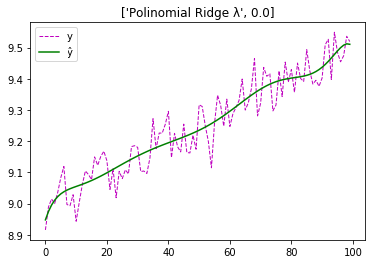

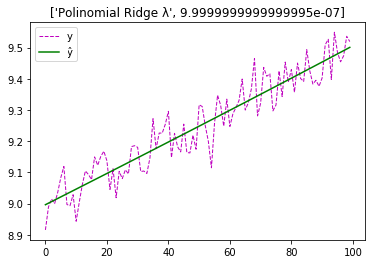

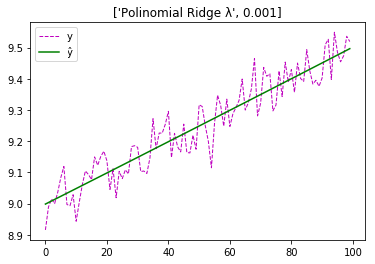

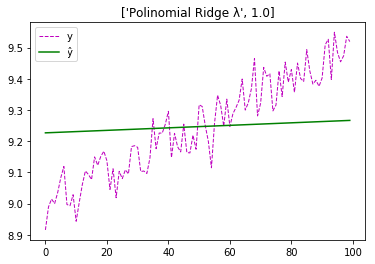

In [893]:
Lambdalist = np.array([0,1e-6,1e-3,1])

def TaskB(Lambdalist):
    Coef = []
    poly   = PolynomialFeatures(50)
    Xtrans = poly.fit_transform(D1x)
    for i in Lambdalist:
        Ridge = sklm.Ridge (alpha = i)
        Ridge.fit(Xtrans,D1y)
        D1ŷ = Ridge.predict(Xtrans)
        plt.plot(D1y,'--m',linewidth=1)
        plt.plot(D1ŷ,'-g')
        plt.title(["Polinomial Ridge λ", i])
        plt.legend(["y", "ŷ"])
        plt.show()
        Coef.append(Ridge.coef_[0])
    return Coef

RdCoef = TaskB(Lambdalist)

### Bonus: Implement Elastic Net using Stochastic Gradient Descent (SGD)(5 Points) 
Elastic Net is a linear model that have both L1 and L2 regularization terms. In this task you are required to implement (without using Scikit Learn) Elastic Net model using SGD algorithm. Use dataset D2 .You have to perform the steps presented bellow

1. Create Train and Test splits.

2. Implement Elastic Net model with SGD.



In [964]:
def Soft(x,e):
    if x>e:
        value = x-e
    else:
        if abs(x)<=e:
            value = 0
        else:
            if x<-1*e:
                value = x+e
    return value

def ENet(x,y,x2,y2,L1,L2,epoch,i):             #i- batchsize, λa L2, λb L1
    ErrTr = []                                  #To store the error on trial data
    ErrTst = []
    Btr = np.array([[10.0]]*len(x.T))              #Betas values Initialized to 1
    for n in np.arange(epoch):                  #Number of times to run an epoch
        xy= np.concatenate((x,y),axis=1)
        L = np.random.shuffle(xy)
        n= 0
        for h in np.arange(len(xy)//i +1):
            x = xy[:,0:-1]
            y = np.array([xy[:,-1]]).T
            xt= x[n*i:(n+1)*i]
            yt= y[n*i:(n+1)*i]
            n=n+1
            for b in np.arange(len(Btr)):
                val    = xt[:,b].T.dot((yt - np.delete(xt,b,axis=1).dot(np.delete(Btr,b,axis=0))))/(L2 + xt[:,b].T.dot(xt[:,b]))
                e      = 0.5*L1/(L2 + xt[:,b].T.dot(xt[:,b]))
                Btr[b] = Soft(val,e)
        ErTr = SQLoss(x,y,Btr)
        ErTst = SQLoss(x2,y2,Btr)
        ErrTr.append(ErTr)
        ErrTst.append(ErTst)
    plt.plot(ErrTr)                 
    plt.plot(ErrTst)
    plt.title("Coordinate GD LASSO - RMSE vs Epoch")
    plt.xlabel("Epoch")    
    plt.ylabel("RMSE")
    plt.legend(["Training","Test"])
    plt.show() 
    return Btr


3. You have to observe the behavior of two regularization constants i.e. λ1 and λ2 . Choose combination such that meeth the specification indicated bellow. Plot learning curves (RMSE on Train and Test for each iteration).
        
        a) Both have small values

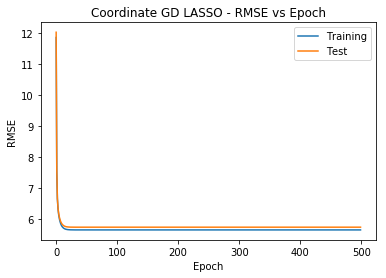

In [988]:
Bval = ENet(D2xtr,D2ytr,D2xtst,D2ytst,0.1,0.1,500,2000)

    b) λ1 is zero

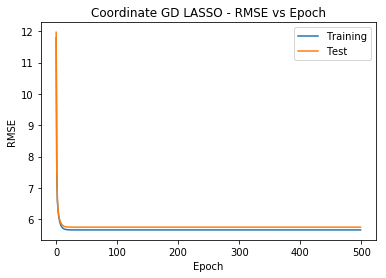

In [989]:
Bval = ENet(D2xtr,D2ytr,D2xtst,D2ytst,0,10,500,2000)

    c) λ2 is zero 

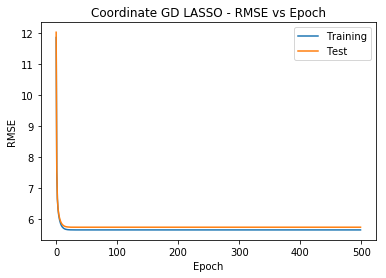

In [990]:
Bval = ENet(D2xtr,D2ytr,D2xtst,D2ytst,10,0,500,2000)

    d) larger values. Explain the behavior.


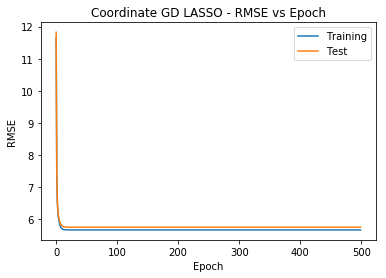

In [991]:
Bval = ENet(D2xtr,D2ytr,D2xtst,D2ytst,30,30,500,2000)

Discussion: For each combination of L1, vs L2 values tested the model converges, but the effect is better visualized on the coefficients, and the values of the corresponding errors, as showed in the cross validation method bellow

## Parameter Tuning
Plot learning curves (RMSE on Train and Test for each iteration)

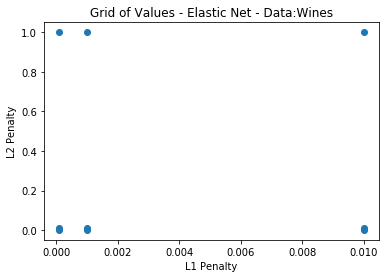

In [962]:
L1 = [1e-3,0.5,1,10,30]
L2 = [1e-3,0.5,1,10,30]
ENEtComb = np.array(list(it.product(L1,L2))) #Posible combiations on Step Size-Ridge Regularization

plt.title("Grid of Values - Elastic Net - Data:Wines")
plt.xlabel("L1 Penalty")    
plt.ylabel("L2 Penalty")
plt.plot(Comb[:,0], Comb[:,1], 'o')
plt.show()

In [950]:
def ENetGr(x,y,L1,L2,epoch,i):             #i- batchsize (can be used aso as folds), λa L2, λb L1 
    ErrTr = []                                  #To store the error on trial data
    Btr = np.array([[1.0]]*len(x.T))              #Betas values Initialized to 1
    for n in np.arange(epoch):                  #Number of times to run an epoch
        xy= np.concatenate((x,y),axis=1)
        L = np.random.shuffle(xy)
        n= 0
        for h in np.arange(len(xy)//i +1):
            x = xy[:,0:-1]
            y = np.array([xy[:,-1]]).T
            xt= x[n*i:(n+1)*i]
            yt= y[n*i:(n+1)*i]
            n=n+1
            for b in np.arange(len(Btr)):
                val    = xt[:,b].T.dot((yt - np.delete(xt,b,axis=1).dot(np.delete(Btr,b,axis=0))))/(L2 + xt[:,b].T.dot(xt[:,b]))
                e      = 0.5*L1/(L2 + xt[:,b].T.dot(xt[:,b]))
                Btr[b] = Soft(val,e)
        ErTr = SQLoss(x,y,Btr)
        ErrTr.append(ErTr)
    return Btr

In [966]:
def SQLoss(x,y,B):                    #Root Mean Squared Loss (y-ŷ)²
    Loss = (np.sum((y - x.dot(B))**2)/len(x))**0.5
    return Loss

def ENetGrid(x,y,GridList,epoch,i):
    RMSEGrid = []
    BetasLearned = []
    for i in np.arange(len(GridList)):
        L1,L2 = GridList[i]
        print("L1: ",L1,"L2: ",L2)
        Bfinal = ENetGr(x,y,L1,L2,epoch,i)
        ErTr = SQLoss(x,y,Bfinal)
        RMSEGrid.append(ErTr)
        BetasLearned.append(Bfinal[:,0])
        print("Error is",ErTr)
    return BetasLearned, RMSEGrid


#### Grid Search
Best Values found, L1=30 L2=0.001

In [967]:
Betas, RMSEGrid = ENetGrid(D2xtr,D2ytr,ENEtComb,10,2000)

L1:  0.001 L2:  0.001
Error is 5.67380546276
L1:  0.001 L2:  0.5


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  


Error is 5.67380546276
L1:  0.001 L2:  1.0
Error is 5.67380546276
L1:  0.001 L2:  10.0
Error is 5.85409970645
L1:  0.001 L2:  30.0
Error is 5.69749889421
L1:  0.5 L2:  0.001
Error is 1.9801905607e+36
L1:  0.5 L2:  0.5
Error is 8.84479320895
L1:  0.5 L2:  1.0
Error is 11.0562300181
L1:  0.5 L2:  10.0
Error is 7.05609978259
L1:  0.5 L2:  30.0
Error is 5.8182735848
L1:  1.0 L2:  0.001
Error is 19.1179144204
L1:  1.0 L2:  0.5
Error is 9.34290852316
L1:  1.0 L2:  1.0
Error is 6.92599252616
L1:  1.0 L2:  10.0
Error is 6.00802239318
L1:  1.0 L2:  30.0
Error is 5.78389526112
L1:  10.0 L2:  0.001
Error is 9.09411304177
L1:  10.0 L2:  0.5
Error is 7.46504198519
L1:  10.0 L2:  1.0
Error is 7.21788194745
L1:  10.0 L2:  10.0
Error is 5.91411393534
L1:  10.0 L2:  30.0
Error is 6.01326246374
L1:  30.0 L2:  0.001
Error is 5.66999955065
L1:  30.0 L2:  0.5
Error is 5.74289651497
L1:  30.0 L2:  1.0
Error is 5.73747148415
L1:  30.0 L2:  10.0
Error is 5.95776647364
L1:  30.0 L2:  30.0
Error is 5.6944165771

In [968]:
Betas

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.19300167,  0.01105515,  0.1003414 , -0.46323977, -0.35851636,
        -0.57693216, -0.05354877, -0.52572936,  0.22636403, -0.1143008 ,
         0.68379813]),
 array([ 0.05951313, -0.21944239,  0.01260505, -0.25837366, -0.22523289,
        -0.23836259, -0.25445074,  0.05456603,  0.01588232,  0.17778759,
        -0.18874013]),
 array([  1.40698307e+36,  -3.85035732e+35,  -2.59852603e+35,
          5.77666489e+35,   2.80034907e+35,  -4.45393665e+34,
          3.68566674e+35,   6.81448774e+35,   3.06436276e+34,
         -4.99317386e+35,   4.84955096e+35]),
 array([-3.32764662, -1.48560138,  3.01808644, -6.00465666,  0.20116464,
        -0.21913443,  0.        , -0.09896803, -1.82050759, -0.1083961 ,
         0.65193655]),
 array([-6.37796036,  2.57015627, -2.4328297 , -2.05459288, -3.219

#### Grid Search Results ( as RMSE) for ENet values
Note: Value #6 of the RMSEgrid ignored, as is too big to plot

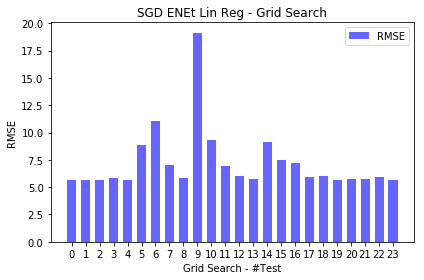

In [982]:
Plot_this(np.delete(RMSEGrid,5,axis=0),np.arange(24),"b")